In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd 
import re
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


# Collecting the data

In [2]:
print("You can narrow the search by specifying the years")
keyword = input("Please enter keyword or hashtag to search: ")

NoOfTweets = int(input("Please enter how many tweets to analyze: "))

tweets = []
limit = NoOfTweets

for tweet in sntwitter.TwitterSearchScraper(keyword).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.user.username,tweet.content])
df = pd.DataFrame(tweets, columns =['Date', 'User', 'Tweet'])

You can narrow the search by specifying the years
Please enter keyword or hashtag to search: Nike
Please enter how many tweets to analyze: 100


Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=Nike&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&pc=1&spelling_corrections=1&ext=mediaStats%2ChighlightedLabel: non-200 status code
4 requests to https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-1

ScraperException: 4 requests to https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=Nike&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&pc=1&spelling_corrections=1&ext=mediaStats%2ChighlightedLabel failed, giving up.

# Cleaning The Data

In [3]:
def clean_text(text):
    #remove hashatags, mentions, url using regular expression and the punctuation
    text = re.sub(r'#\w+','',text)
    text = re.sub(r'@\w+','',text)
    text = re.sub(r'https?://\S+','',text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    return text

df['Tweet']= df['Tweet'].apply(clean_text)

In [5]:
df.to_csv("Tweets2.csv")

In [6]:
data = pd.read_csv("Tweets1.csv")

# Perform a Sentiment Analysis


In [4]:
#Create a function that performs the sentiment analysis
def get_tweet_sentiment(tweet):
    #Create TextBlob objectwe
    analysis = TextBlob(tweet)
    #set sentiment
    if analysis.sentiment.polarity> 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else: 
        return 'negative'

In [5]:
df['Sentiment'] = df['Tweet'].apply(get_tweet_sentiment)

# Create a word Cloud

In [6]:
txt = df["Tweet"]

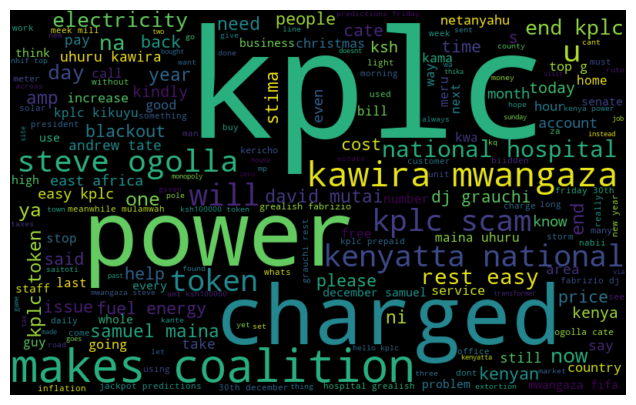

In [7]:
#Get the list of English stopwords
stop_words = stopwords.words("english")

filtered_words = [word for word in txt if word not in stop_words]
#Create a word cloud 
wordcloud = WordCloud(height = 500, width = 800).generate("".join(filtered_words))
#Visualize the WordCloud
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Creating a Pie Chart representing the neutral, positive and negative


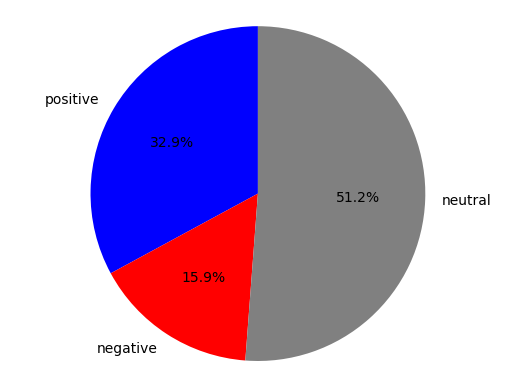

In [8]:
#Define the counts for -ve, +ve and neutral so we can create data
sentiment_counts = df['Sentiment'].value_counts()
positive_count = sentiment_counts['positive']
negative_count = sentiment_counts['negative']
neutral_count = sentiment_counts['neutral']
#create  pie chart
labels = ['positive', 'negative', 'neutral']
sizes = [positive_count, negative_count, neutral_count]
colors = ['blue', 'red','grey']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

# Create BarChart

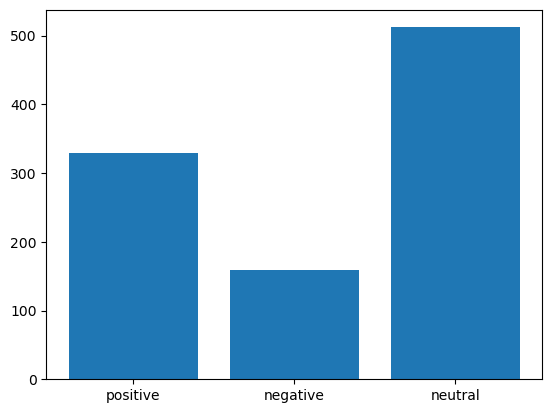

In [9]:
# Convert the y-axis tick labels to percentages
total = sum(sizes)
ax1.set_yticklabels(['{:,.0%}'.format(y/total) for y in ax1.get_yticks()])

fig, ax = plt.subplots()
ax.bar(labels, sizes)



plt.show()

# Create a seperate dataframe that will have the sentiments  and visualize using WordCloud respectively 

In [10]:
#Create a dataframe for each sentiment 
positive_df = df.groupby('Sentiment').get_group('positive')
negative_df = df.groupby('Sentiment').get_group('negative')
neutral_df = df.groupby('Sentiment').get_group('neutral')

In [11]:
positive_df.head()

,Date,User,Tweet,Sentiment
3,2022-12-30 14:02:06+00:00,KaseeKim,why do you need a bio digester instead of a se...,positive
4,2022-12-30 14:01:42+00:00,WasikeQuincy,which free market are you talking about elec...,positive
6,2022-12-30 14:00:10+00:00,KPLC7News,the 87 increase to adjust for inflation is the...,positive
8,2022-12-30 13:58:20+00:00,DanGithinji_,house for sale joska kangundo rd master ensuit...,positive
9,2022-12-30 13:58:04+00:00,lawykoskey,just when you think youve seen it all\n\namazi...,positive


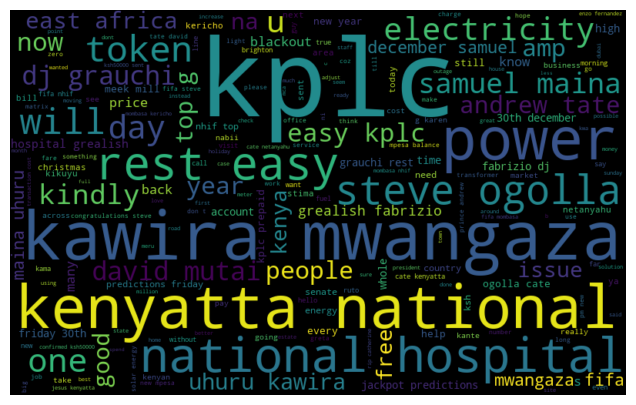

In [13]:
positive_txt = positive_df['Tweet']
#Get the list of English stopwords
stop_words = stopwords.words("english")

filtered_words = [word for word in positive_txt if word not in stop_words]
#Create a word cloud 
wordcloud = WordCloud(height = 500, width = 800).generate("".join(filtered_words))
#Visualize the WordCloud
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [12]:
negative_df.head()

,Date,User,Tweet,Sentiment
5,2022-12-30 14:00:43+00:00,JudeJoroge,documents lapi books na lazima zionekane fit...,negative
30,2022-12-30 13:30:48+00:00,GiravoyaBonface,kplc should be at your home as a backup for so...,negative
36,2022-12-30 13:25:14+00:00,sholla_saddam,just stop\n\nstop sleeping late\nstop overthin...,negative
39,2022-12-30 13:24:21+00:00,sholla_saddam,how to better build discipline in 2023\n\n med...,negative
50,2022-12-30 13:18:43+00:00,Safaricom_Care,hi sorry the service is not available for kpl...,negative


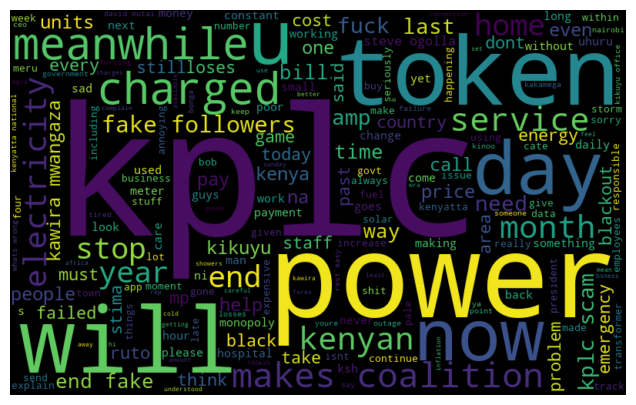

In [14]:
negative_txt = negative_df['Tweet']
#Get the list of English stopwords
stop_words = stopwords.words("english")

filtered_words = [word for word in negative_txt if word not in stop_words]
#Create a word cloud 
wordcloud = WordCloud(height = 500, width = 800).generate("".join(filtered_words))
#Visualize the WordCloud
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

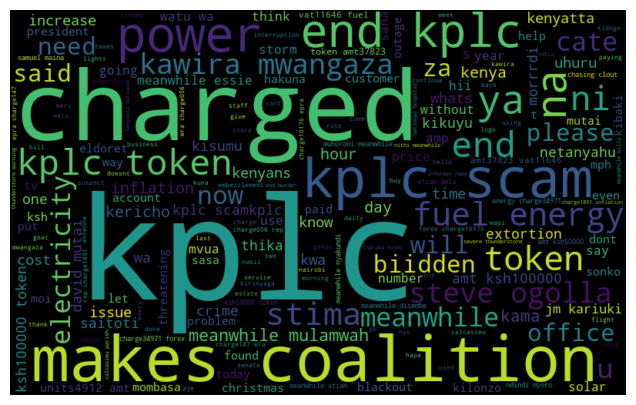

In [15]:
neutral_txt = neutral_df['Tweet']
#Get the list of English stopwords
stop_words = stopwords.words("english")

filtered_words = [word for word in neutral_txt if word not in stop_words]
#Create a word cloud 
wordcloud = WordCloud(height = 500, width = 800).generate("".join(filtered_words))
#Visualize the WordCloud
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [16]:
jupyter nbconvert --to html TwitterScrapper.ipynb


SyntaxError: invalid syntax (1766839688.py, line 1)